In [20]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/tutors-lessons-prices-prediction')

100%|██████████| 2.56M/2.56M [00:00<00:00, 3.45MB/s]


Extracting archive .\tutors-lessons-prices-prediction/tutors-lessons-prices-prediction.zip to .\tutors-lessons-prices-prediction


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
train = pd.read_excel('./tutors-lessons-prices-prediction/train.xlsx').drop(columns='Unnamed: 0')
test = pd.read_excel('./tutors-lessons-prices-prediction/test.xlsx').drop(columns='Unnamed: 0')
sample_submit = pd.read_csv('./tutors-lessons-prices-prediction/sample_submit.csv')

In [2]:
train.head(2)

,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,Education_4,Desc_Education_4,Ученая степень 1,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,matematika,Репетитор по математике Емельянова Марина Владиславовна - фотография,"['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ']",5.0,2,Репетитор не предоставил о себе дополнительных сведений,NaN,Томский государственный университет им. В.В. Куйбышева,"Год окончания: 1990, Факультет: механико-математический факультет, Специальность: прикладная математика",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']",16.666667
1,matematika,Репетитор по математике Назарова Анастасия Андреевна - фотография,"['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ']",4.0,7,Репетитор не предоставил о себе дополнительных сведений,NaN,Вологодский государственный педагогический университет,"Год окончания: 2017, Факультет: факультет прикладной математики и информатики, Специальность: прикладная математика и информатика",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт информационных технологий, Специальность: преподаватель математики и информатики",NaN,NaN,NaN,NaN,NaN,NaN,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']",11.666667


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   предмет           4548 non-null   object 
 1   ФИО               4548 non-null   object 
 2   tutor_head_tags   4548 non-null   object 
 3   tutor_rating      3959 non-null   float64
 4   tutor_reviews     4548 non-null   int64  
 5   description       4547 non-null   object 
 6   experience_desc   2171 non-null   object 
 7   Education_1       4548 non-null   object 
 8   Desc_Education_1  4472 non-null   object 
 9   Education_2       781 non-null    object 
 10  Desc_Education_2  777 non-null    object 
 11  Education_3       106 non-null    object 
 12  Desc_Education_3  105 non-null    object 
 13  Education_4       16 non-null     object 
 14  Desc_Education_4  16 non-null     object 
 15  Ученая степень 1  76 non-null     object 
 16  Ученое звание 1   35 non-null     object 


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns=['mean_price']), train['mean_price'], test_size=0.2, random_state=42)

**Некоторые клиенты предпочитают репетитора определенного пола, сделаем колонку с полом, а ФИО удалим**

In [6]:
X_train['sex'] = X_train['ФИО'].apply(lambda x: 1 if 'ич' in x else 0)
X_train.drop(columns=['ФИО'], inplace=True)
#Т.к это профиру, то большиство людей русские с отчеством, а отчество у мужчин оканчивается на ич или евич. Будут отдельные выбросы мб у людей без отчества или нерусских, надо смотреть отдельно

**Где нет рейтинга у репетитора, поставим 0**

In [7]:
X_train['tutor_rating'] = X_train['tutor_rating'].fillna(0).astype('float')

**Второго ученого звания нет ни у кого, можно удалить колонки**

In [8]:
X_train[X_train['Ученое звание 2'].isna()==False]['предмет'].count()

0

In [9]:
X_train.drop(columns=['Ученое звание 2', 'Ученая степень 2'], inplace=True)

**Приведем в единый вид колонки Ученая степень 1 и Ученое звание 1**

In [10]:
X_train['Ученая степень 1'].unique()

array([nan, ' кандидат технических наук ', ' Кандидат технических наук ',
       ' Кандидат физико-математических наук ',
       ' кандидат физико-математических наук ',
       ' Кандидат педагогических наук ', ' Доктор технических наук ',
       ' Доктор физико-математических наук ',
       ' доктор физико-математических наук ',
       ' кандидат биологических наук ', ' Кандидат химических наук '],
      dtype=object)

In [11]:
X_train['Ученое звание 1'].unique()

array([nan, ' доцент ', ' Доцент ', ' старший научный сотрудник ',
       ' Старший научный сотрудник ', ' Профессор ', ' профессор '],
      dtype=object)

In [12]:
X_train['Ученая степень 1'] = X_train['Ученая степень 1'].fillna('отсутствует').apply(lambda x: x.lower().strip())
X_train['Ученое звание 1'] = X_train['Ученое звание 1'].fillna('отсутствует').apply(lambda x: x.lower().strip())

**Очень мало людей со степенями/званиями, и тем более они разные, модель вряд ли сможет корректно на таком кол-ве научиться, предлагаю перевести все в категорию есть/отсутсвует степень/звание**

In [13]:
X_train['Ученая степень 1'].value_counts()

Ученая степень 1
отсутствует                            3580
кандидат физико-математических наук      27
кандидат технических наук                24
кандидат педагогических наук              2
доктор физико-математических наук         2
доктор технических наук                   1
кандидат биологических наук               1
кандидат химических наук                  1
Name: count, dtype: int64

In [14]:
X_train['Ученое звание 1'].value_counts()

Ученое звание 1
отсутствует                  3613
доцент                         15
старший научный сотрудник       8
профессор                       2
Name: count, dtype: int64

In [15]:
X_train['Ученая степень 1'] = X_train['Ученая степень 1'].apply(lambda x: 0 if x=='отсутствует' else 1)
X_train['Ученое звание 1'] = X_train['Ученое звание 1'].apply(lambda x: 0 if x=='отсутствует' else 1)

**В колонке с опытом переведем все в числа, удалим описание опыта и описание самого репетитора, т.к оно нам дополнительного ничего не скажет**

In [16]:
X_train.drop(columns=['experience_desc', 'description'], inplace=True)

In [17]:
X_train['experience'] = X_train['experience'].fillna('0').apply(lambda x: float(x.strip().split(' ')[0])).astype(int)
X_train['experience'].unique()

array([10,  4,  2, 12, 45,  6,  7,  5,  8, 38,  3,  9, 42, 13,  1, 19, 27,
       29, 21,  0, 16, 15, 11, 37, 44, 28, 26, 40, 34, 20, 24, 14, 32, 18,
       25, 17, 22, 33, 43, 31, 39, 41, 30, 36, 23, 51, 48, 50, 53, 47, 52,
       35, 46, 55, 54, 68])

**Вместо колонок с образованием введем колонку с кол-вом образования**

In [18]:
X_train["Cnt_Education"] = X_train[["Education_1", "Education_2", "Education_3", "Education_4", "Education_5", "Education_6"]].notna().sum(axis=1)
X_train.drop(columns=['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6', 'Desc_Education_1', 'Desc_Education_2', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6'], inplace=True)

**Вместо колонки категории введем отдельные колонки 'школьники с 5 по 9 класс', 'школьники с 10 по 11 класс, 'студенты колледжей и техникумов', 'абитуриенты'**

In [19]:
X_train['школьники с 5 по 9 класс'] = X_train['categories'].apply(lambda x: 1 if 'школьники с 5 по 9 класс' in x.lower() else 0)
X_train['школьники с 10 по 11 класс'] = X_train['categories'].apply(lambda x: 1 if 'школьники с 10 по 11 класс' in x.lower() else 0)
X_train['студенты колледжей и техникумов'] = X_train['categories'].apply(lambda x: 1 if 'студенты колледжей и техникумов' in x.lower() else 0)
X_train['абитуриенты'] = X_train['categories'].apply(lambda x: 1 if 'абитуриенты' in x.lower() else 0)
X_train.drop(columns=['categories'], inplace=True)

**Вместо колонки tutor_head_tags введем отдельные колонки 'школьная программа', 'подготовка к ЕГЭ, 'подготовка к ОГЭ', 'подготовка к олимпиадам', 'вузовские предметы'**

In [20]:
X_train['школьная программа'] = X_train['tutor_head_tags'].apply(lambda x: 1 if 'школьная программа' in x.lower() else 0)
X_train['подготовка к ЕГЭ'] = X_train['tutor_head_tags'].apply(lambda x: 1 if 'подготовка к ЕГЭ' in x.lower() else 0)
X_train['подготовка к ОГЭ'] = X_train['tutor_head_tags'].apply(lambda x: 1 if 'подготовка к ОГЭ' in x.lower() else 0)
X_train['подготовка к олимпиадам'] = X_train['tutor_head_tags'].apply(lambda x: 1 if 'подготовка к олимпиадам' in x.lower() else 0)
X_train['вузовские предметы'] = X_train['tutor_head_tags'].apply(lambda x: 1 if len(x) > 4 else 0)
X_train.drop(columns=['tutor_head_tags'], inplace=True)

**Вместо колонки status сделаем колонки 'частный преподаватель', 'школьный преподаватель', 'университетский преподаватель'**

In [21]:
X_train['частный преподаватель'] = X_train['status'].fillna('частный преподаватель').apply(lambda x: 1 if ('частный преподаватель' in x.lower()  or 'студент' in x.lower() or 'аспирант' in x.lower()) else 0)
X_train['школьный преподаватель'] = X_train['status'].fillna('частный преподаватель').apply(lambda x: 1 if 'школьный преподаватель' in x.lower() else 0)
X_train['университетский преподаватель'] = X_train['status'].fillna('частный преподаватель').apply(lambda x: 1 if 'университетский преподаватель' in x.lower() else 0)
X_train.drop(columns=['status'], inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['предмет'] = le.fit_transform(X_train['предмет'])
X_train

,предмет,tutor_rating,tutor_reviews,Ученая степень 1,Ученое звание 1,experience,sex,Cnt_Education,школьники с 5 по 9 класс,школьники с 10 по 11 класс,студенты колледжей и техникумов,абитуриенты,школьная программа,подготовка к ЕГЭ,подготовка к ОГЭ,подготовка к олимпиадам,вузовские предметы,частный преподаватель,школьный преподаватель,университетский преподаватель
540,1,5.0,1,0,0,10,0,1,1,1,1,1,1,0,0,0,1,1,0,0
3948,1,0.0,0,0,0,4,1,1,1,1,1,1,1,0,0,1,1,1,0,0
2098,1,0.0,0,0,0,4,0,1,1,1,1,1,1,0,0,0,1,1,0,0
3280,0,0.0,0,0,0,2,1,1,1,1,1,1,1,0,0,0,1,1,0,0
4533,1,5.0,17,0,0,12,1,2,0,1,1,1,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1,0.0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,1,0,0
466,1,0.0,0,0,0,9,1,1,1,0,0,0,1,0,0,0,1,1,0,0
3092,1,0.0,0,0,0,7,0,1,1,1,1,1,1,0,0,0,1,1,0,0
3772,1,5.0,1,0,0,14,0,1,1,1,1,1,1,0,0,0,1,1,0,0


**С валидационной выборкой нужно сделать те же действия по преобразованию**

In [23]:
X_valid['sex'] = X_valid['ФИО'].apply(lambda x: 1 if 'ич' in x else 0)
X_valid.drop(columns=['ФИО'], inplace=True)
X_valid['tutor_rating'] = X_valid['tutor_rating'].fillna(0).astype('float')
X_valid.drop(columns=['Ученое звание 2', 'Ученая степень 2'], inplace=True)
X_valid['Ученая степень 1'] = X_valid['Ученая степень 1'].fillna('отсутствует').apply(lambda x: x.lower().strip())
X_valid['Ученое звание 1'] = X_valid['Ученое звание 1'].fillna('отсутствует').apply(lambda x: x.lower().strip())
X_valid['Ученая степень 1'] = X_valid['Ученая степень 1'].apply(lambda x: 0 if x=='отсутствует' else 1)
X_valid['Ученое звание 1'] = X_valid['Ученое звание 1'].apply(lambda x: 0 if x=='отсутствует' else 1)
X_valid.drop(columns=['experience_desc', 'description'], inplace=True)
X_valid['experience'] = X_valid['experience'].fillna('0').apply(lambda x: float(x.strip().split(' ')[0])).astype(int)
X_valid["Cnt_Education"] = X_valid[["Education_1", "Education_2", "Education_3", "Education_4", "Education_5", "Education_6"]].notna().sum(axis=1)
X_valid.drop(columns=['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6', 'Desc_Education_1', 'Desc_Education_2', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6'], inplace=True)
X_valid['школьники с 5 по 9 класс'] = X_valid['categories'].apply(lambda x: 1 if 'школьники с 5 по 9 класс' in x.lower() else 0)
X_valid['школьники с 10 по 11 класс'] = X_valid['categories'].apply(lambda x: 1 if 'школьники с 10 по 11 класс' in x.lower() else 0)
X_valid['студенты колледжей и техникумов'] = X_valid['categories'].apply(lambda x: 1 if 'студенты колледжей и техникумов' in x.lower() else 0)
X_valid['абитуриенты'] = X_valid['categories'].apply(lambda x: 1 if 'абитуриенты' in x.lower() else 0)
X_valid.drop(columns=['categories'], inplace=True)
X_valid['школьная программа'] = X_valid['tutor_head_tags'].apply(lambda x: 1 if 'школьная программа' in x.lower() else 0)
X_valid['подготовка к ЕГЭ'] = X_valid['tutor_head_tags'].apply(lambda x: 1 if 'подготовка к ЕГЭ' in x.lower() else 0)
X_valid['подготовка к ОГЭ'] = X_valid['tutor_head_tags'].apply(lambda x: 1 if 'подготовка к ОГЭ' in x.lower() else 0)
X_valid['подготовка к олимпиадам'] = X_valid['tutor_head_tags'].apply(lambda x: 1 if 'подготовка к олимпиадам' in x.lower() else 0)
X_valid['вузовские предметы'] = X_valid['tutor_head_tags'].apply(lambda x: 1 if len(x) > 4 else 0)
X_valid.drop(columns=['tutor_head_tags'], inplace=True)
X_valid['частный преподаватель'] = X_valid['status'].fillna('частный преподаватель').apply(lambda x: 1 if ('частный преподаватель' in x.lower()  or 'студент' in x.lower() or 'аспирант' in x.lower()) else 0)
X_valid['школьный преподаватель'] = X_valid['status'].fillna('частный преподаватель').apply(lambda x: 1 if 'школьный преподаватель' in x.lower() else 0)
X_valid['университетский преподаватель'] = X_valid['status'].fillna('частный преподаватель').apply(lambda x: 1 if 'университетский преподаватель' in x.lower() else 0)
X_valid.drop(columns=['status'], inplace=True)
X_valid['предмет'] = le.transform(X_valid['предмет'])

**Попробуем линейную регрессию**

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, lr.predict(X_valid))
#Ошибка получилась большеватая...

108.2659637096866

In [41]:
import numpy as np
result_lr = pd.DataFrame([np.array(y_valid), lr.predict(X_valid), abs(np.array(y_valid) - lr.predict(X_valid))/np.array(y_valid)*100]).T
result_lr.columns = ['y_valid', 'y_pred', 'delta_pct']
result_lr.sort_values('delta_pct', ascending=False)

,y_valid,y_pred,delta_pct
21,0.066667,16.293339,24340.008327
871,0.066667,14.459018,21588.526533
673,0.083333,16.844677,20113.612153
143,0.094444,18.888457,19899.542975
564,0.158333,30.771156,19334.414235
...,...,...,...
797,16.666667,16.607915,0.352511
682,16.666667,16.607915,0.352511
500,16.666667,16.710603,0.263619
111,16.666667,16.677039,0.062233


In [44]:
test['sex'] = test['ФИО'].apply(lambda x: 1 if 'ич' in x else 0)
test.drop(columns=['ФИО'], inplace=True)
test['tutor_rating'] = test['tutor_rating'].fillna(0).astype('float')
test.drop(columns=['Ученое звание 2', 'Ученая степень 2'], inplace=True)
test['Ученая степень 1'] = test['Ученая степень 1'].fillna('отсутствует').apply(lambda x: x.lower().strip())
test['Ученое звание 1'] = test['Ученое звание 1'].fillna('отсутствует').apply(lambda x: x.lower().strip())
test['Ученая степень 1'] = test['Ученая степень 1'].apply(lambda x: 0 if x=='отсутствует' else 1)
test['Ученое звание 1'] = test['Ученое звание 1'].apply(lambda x: 0 if x=='отсутствует' else 1)
test.drop(columns=['experience_desc', 'description'], inplace=True)
test['experience'] = test['experience'].fillna('0').apply(lambda x: float(x.strip().split(' ')[0])).astype(int)
test["Cnt_Education"] = test[["Education_1", "Education_2", "Education_3", "Education_4", "Education_5", "Education_6"]].notna().sum(axis=1)
test.drop(columns=['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6', 'Desc_Education_1', 'Desc_Education_2', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6'], inplace=True)
test['школьники с 5 по 9 класс'] = test['categories'].apply(lambda x: 1 if 'школьники с 5 по 9 класс' in x.lower() else 0)
test['школьники с 10 по 11 класс'] = test['categories'].apply(lambda x: 1 if 'школьники с 10 по 11 класс' in x.lower() else 0)
test['студенты колледжей и техникумов'] = test['categories'].apply(lambda x: 1 if 'студенты колледжей и техникумов' in x.lower() else 0)
test['абитуриенты'] = test['categories'].apply(lambda x: 1 if 'абитуриенты' in x.lower() else 0)
test.drop(columns=['categories'], inplace=True)
test['школьная программа'] = test['tutor_head_tags'].apply(lambda x: 1 if 'школьная программа' in x.lower() else 0)
test['подготовка к ЕГЭ'] = test['tutor_head_tags'].apply(lambda x: 1 if 'подготовка к ЕГЭ' in x.lower() else 0)
test['подготовка к ОГЭ'] = test['tutor_head_tags'].apply(lambda x: 1 if 'подготовка к ОГЭ' in x.lower() else 0)
test['подготовка к олимпиадам'] = test['tutor_head_tags'].apply(lambda x: 1 if 'подготовка к олимпиадам' in x.lower() else 0)
test['вузовские предметы'] = test['tutor_head_tags'].apply(lambda x: 1 if len(x) > 4 else 0)
test.drop(columns=['tutor_head_tags'], inplace=True)
test['частный преподаватель'] = test['status'].fillna('частный преподаватель').apply(lambda x: 1 if ('частный преподаватель' in x.lower()  or 'студент' in x.lower() or 'аспирант' in x.lower()) else 0)
test['школьный преподаватель'] = test['status'].fillna('частный преподаватель').apply(lambda x: 1 if 'школьный преподаватель' in x.lower() else 0)
test['университетский преподаватель'] = test['status'].fillna('частный преподаватель').apply(lambda x: 1 if 'университетский преподаватель' in x.lower() else 0)
test.drop(columns=['status'], inplace=True)
test['предмет'] = le.transform(test['предмет'])

In [60]:
submission_lr = pd.DataFrame({
    'index': test.index,
    'mean_price': lr.predict(test)
})
submission_lr.to_csv('submission_lr.csv', index=False)

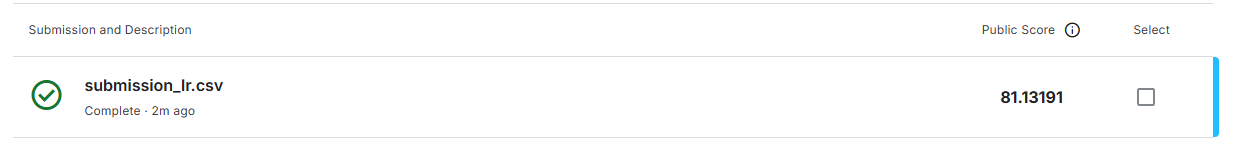

**Попробуем случайный лес**

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rg_rf = RandomForestRegressor(max_depth=5)
rg_rf.fit(X_train, y_train)
# смотрим разницу факта и прогноза для случайного леса
result_rg_rf = pd.DataFrame([np.array(y_valid), rg_rf.predict(X_valid)]).T
result_rg_rf.columns = ['y_test', 'y_pred']
result_rg_rf.head()

,y_test,y_pred
0,25.000000,17.800900
1,18.333333,13.618101
2,41.666667,17.813334
3,20.000000,16.007574
4,25.000000,19.460934


In [ ]:
mean_squared_error(y_valid, rg_rf.predict(X_valid))

106.66032354302818

In [71]:
#Поиском по сетке найдем оптимальную глубину дерева решений
from sklearn.model_selection import GridSearchCV
dt_model = RandomForestRegressor()
param_grid = {'max_depth': list(range(1, 20))}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5).fit(X_train, y_train)
print(f"Лучшая глубина = {grid_search.best_params_['max_depth']}")
print(f'Лучшее значение neg_mean_squared_error при этой глубине на тренировачной выборке =', grid_search.best_score_)

Лучшая глубина = 10
Лучшее значение neg_mean_squared_error при этой глубине на тренировачной выборке = -88.82075532005017


In [72]:
rg_rf = RandomForestRegressor(max_depth=10)
rg_rf.fit(X_train, y_train)
# смотрим разницу факта и прогноза для случайного леса
result_rg_rf = pd.DataFrame([np.array(y_valid), rg_rf.predict(X_valid)]).T
result_rg_rf.columns = ['y_test', 'y_pred']
result_rg_rf.head()

,y_test,y_pred
0,25.000000,18.162012
1,18.333333,12.971319
2,41.666667,18.029779
3,20.000000,14.193034
4,25.000000,20.368215


In [ ]:
mean_squared_error(y_valid, rg_rf.predict(X_valid))

103.86704998888246

In [75]:
submission_rg_rf = pd.DataFrame({
    'index': test.index,
    'mean_price': rg_rf.predict(test)
})
submission_rg_rf.to_csv('submission_rg_rf.csv', index=False)

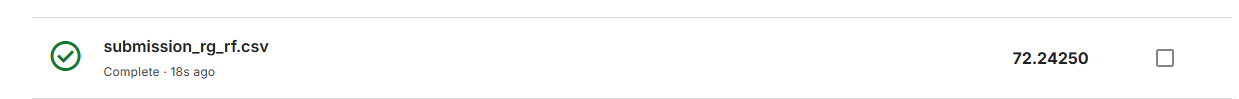

**Попробуем модель KNN**

In [86]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights="uniform")
knn.fit(X_train, y_train)
# смотрим разницу факта и прогноза для случайного леса
result_knn = pd.DataFrame([np.array(y_valid), knn.predict(X_valid)]).T
result_knn.columns = ['y_test', 'y_pred']
result_knn.head()

,y_test,y_pred
0,25.000000,19.000000
1,18.333333,13.333333
2,41.666667,9.873333
3,20.000000,17.023333
4,25.000000,25.000000


In [ ]:
mean_squared_error(y_valid, knn.predict(X_valid))

116.86820712268216

In [80]:
#Поиском по сетке найдем оптимальное количество соседей
dt_model = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1, 20))}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5).fit(X_train, y_train)
print(f"Лучшее значение n_neighbors = {grid_search.best_params_['n_neighbors']}")
print(f'Лучшее значение neg_mean_squared_error при этой глубине на тренировачной выборке =', grid_search.best_score_)

Лучшее значение n_neighbors = 12
Лучшее значение neg_mean_squared_error при этой глубине на тренировачной выборке = -98.50723057611484


In [90]:
knn = KNeighborsRegressor(n_neighbors=12, weights="uniform")
knn.fit(X_train, y_train)
# смотрим разницу факта и прогноза для случайного леса
result_knn = pd.DataFrame([np.array(y_valid), knn.predict(X_valid)]).T
result_knn.columns = ['y_test', 'y_pred']
result_knn.head()

,y_test,y_pred
0,25.000000,17.333333
1,18.333333,12.677122
2,41.666667,20.687963
3,20.000000,14.801389
4,25.000000,19.456636


In [ ]:
mean_squared_error(y_valid, knn.predict(X_valid))

112.83178638497982

In [92]:
submission_knn = pd.DataFrame({
    'index': test.index,
    'mean_price': knn.predict(test)
})
submission_knn.to_csv('submission_knn.csv', index=False)

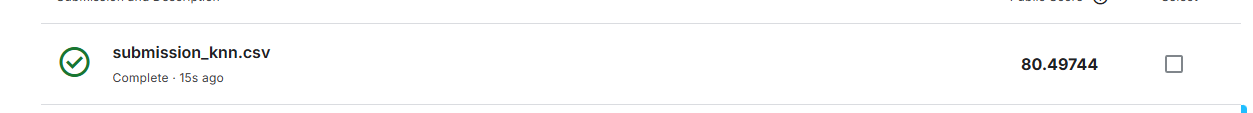

**Ну и как финал попробуем стэкинг трех предыдущих моделей**

In [102]:
from sklearn.ensemble import StackingRegressor

base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(max_depth=10, random_state=42)),
    ('knn', KNeighborsRegressor(n_neighbors=12, weights="uniform"))
]
# Создаём стекинг-регрессор
stacking = StackingRegressor(estimators=base_models, final_estimator=LinearRegression(), passthrough=True)

# Обучаем
stacking.fit(X_train, y_train)

# смотрим разницу факта и прогноза для случайного леса
result_stacking = pd.DataFrame([np.array(y_valid), stacking.predict(X_valid)]).T
result_stacking.columns = ['y_test', 'y_pred']
result_stacking.head()


,y_test,y_pred
0,25.000000,18.050604
1,18.333333,14.341936
2,41.666667,18.929009
3,20.000000,14.445938
4,25.000000,19.742655


In [103]:
mean_squared_error(y_valid, stacking.predict(X_valid))

102.14938518537171

In [104]:
submission_stacking = pd.DataFrame({
    'index': test.index,
    'mean_price': stacking.predict(test)
})
submission_stacking.to_csv('submission_stacking.csv', index=False)

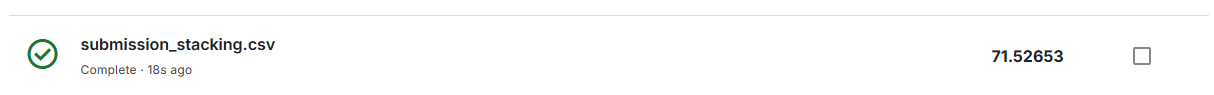

***Результат***

In [105]:
relult = (pd.DataFrame({'Модель': ['Линейная регрессия', 'Случайный лес', 'KNN', 'Стекинг'], 
                        'mean_squared_error': [mean_squared_error(y_valid, lr.predict(X_valid)) ,mean_squared_error(y_valid, rg_rf.predict(X_valid)), mean_squared_error(y_valid, knn.predict(X_valid)), mean_squared_error(y_valid, stacking.predict(X_valid))]
                        }))
relult

,Модель,mean_squared_error
0,Линейная регрессия,108.265964
1,Случайный лес,103.867050
2,KNN,112.831786
3,Стекинг,102.149385


***Победил стекинг***